<center><h1><font color="black">Who is the Strongest?</font></h1></center>

In this kernal we will look at what may be the strongest non-legendary pokemon according to total stats and an analysis comparing stats of non-legendary pokemon by their 1st type to find the strongest pokemon type.



<center><b>Giving Credit Where Credit is Due</b></center>



1. https://www.kaggle.com/balcosandreea/pokemons-a-story-of-eda-visualizing This analysis gave me the idea to look at stats using the mean and taught me how to create multiple charts in an output, thanks again!

2. https://www.kaggle.com/wenxuanchen/pokemon-visualization-radar-chart-t-sne I took the radar chart for this analysis directly from here.

<center><b>Import Libraries</b></center>

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pokemon/Pokemon.csv


<center><b>Read and Clean the Data</b></center>

In [2]:
pokemon = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv') #First we read our csv

In [3]:
pokemon.head() #Check the data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.dtypes #Data types look good

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
pokemon.isnull().sum() #Check for nulls

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

The reason for nullls in Type 2 is because these pokemon do not have a second type, so we are just going to replace them with "None"

In [6]:
pokemon.fillna(value = 'None', inplace=True) #Fill them in

<center><b>Looking for the Strongest Pokemon</b></center>

Here we check to see right off the bat based on which pokemon has the top 40 highest "total".


In [7]:
most_powerful = pokemon[pokemon['Legendary']!= True].sort_values('Total' ,ascending = False) #Sort the data and exclude legendaries

We have a problem, the table shows that most of the strongest are "mega" evolutions of the real pokemon. Now I am a old school pokemon player and stopped after generation 3, so I am going to keep these ones out of the analysis. I also did some research and it appears that these mega evolutions are only temporary during a battle further motivating me to exclude them.

In [8]:
most_powerful.nlargest(40,'Total')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,None,670,150,160,100,95,65,100,3,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
12,9,BlastoiseMega Blastoise,Water,None,630,79,103,120,135,115,78,1,False


In [9]:
pokemon_final = df_without_mega = most_powerful[~most_powerful.Name.str.contains("Mega")] #Dropping rows with "Mega"

In [10]:
pokemon_final[pokemon_final.Name.str.contains("Mega")].sum() #Check to make sure it worked

#             0.0
Name          0.0
Type 1        0.0
Type 2        0.0
Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
Legendary     0.0
dtype: float64

Now all thats left is to prepare the data for plotting!

In [11]:
top_10 = pokemon_final.nlargest(10,'Total') #Define the data set

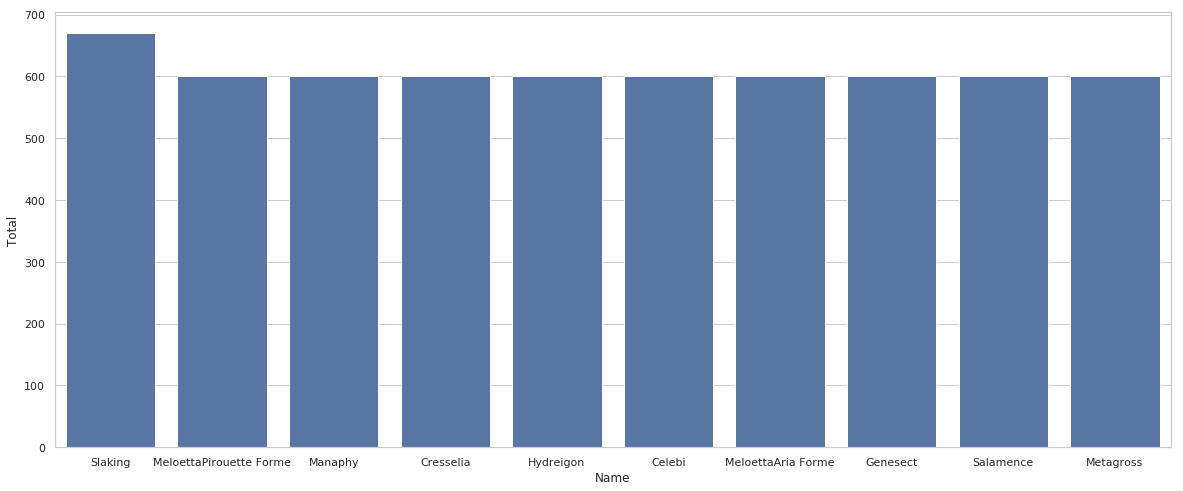

In [27]:
import seaborn as sns #Happy plotting!
from matplotlib import pyplot as plt

plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
base_color = sns.color_palette()[0]

sns.barplot(x="Name", y="Total", data=top_10, color=base_color)

It looks like our winner here is Slaking with 650 total stats.

<Center><b>Looking for Strongest Type of Pokemon</b></center>

Following https://www.kaggle.com/balcosandreea/pokemons-a-story-of-eda-visualizing, I wanted to compare the stats of pokemon by their type. I really liked her idea of using the means of all the stats of pokemon grouped by type in order to do this. I also wanted to try out this analysis using a radar graph I found on https://www.kaggle.com/wenxuanchen/pokemon-visualization-radar-chart-t-sne. I decided to use Type 1 only for this analysis because not all pokemon have a type 2 and Type 1 is usally the main type of a pokemon that has 2 types.

Lets get to it!

In [13]:
stats_df = pokemon_final.groupby('Type 1').mean() #Create the data set to put into the graphs

In [14]:
stats_df

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,346.338462,366.938462,56.076923,65.492308,68.692308,54.338462,63.015385,59.323077,3.323077,False
Dark,469.384615,418.961538,64.807692,84.384615,66.038462,65.692308,65.461538,72.576923,4.115385,False
Dragon,458.529412,443.941176,69.117647,96.647059,71.058824,65.176471,74.000000,67.941176,3.823529,False
Electric,363.973684,421.184211,56.131579,65.131579,64.000000,82.921053,71.131579,81.868421,3.315789,False
Fairy,432.875000,396.500000,70.875000,57.187500,63.875000,75.250000,83.875000,45.437500,4.000000,False
Fighting,362.720000,404.360000,70.240000,94.720000,64.280000,48.560000,63.680000,62.880000,3.360000,False
Fire,339.232558,426.093023,66.209302,77.883721,61.953488,80.883721,66.511628,72.651163,3.348837,False
Flying,714.500000,390.000000,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000,6.000000,False
Ghost,505.214286,412.535714,58.500000,68.250000,79.392857,73.428571,73.178571,59.785714,4.357143,False


First we look at the total stats grouped by type.

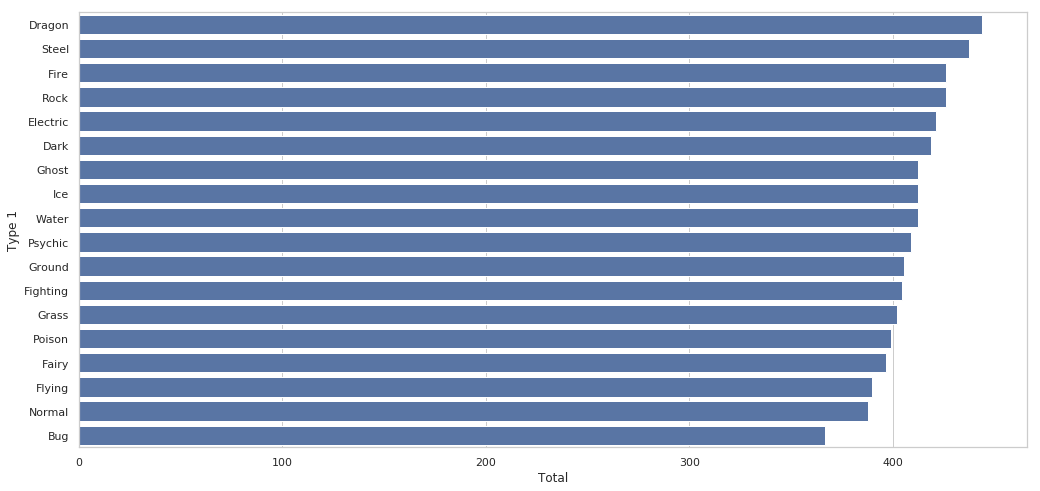

In [26]:
plt.figure(figsize= (17,8))
sns.barplot(x = 'Total', y='Type 1', data=stats_df.reset_index().sort_values('Total', ascending=False),color = base_color)


We see here that dragon types have the overall most total stats with steel following in a close second. Bug pokemon have the least total stats.

Now we take a look at indiviudal stats to compare each type's mean of each stat attribute.

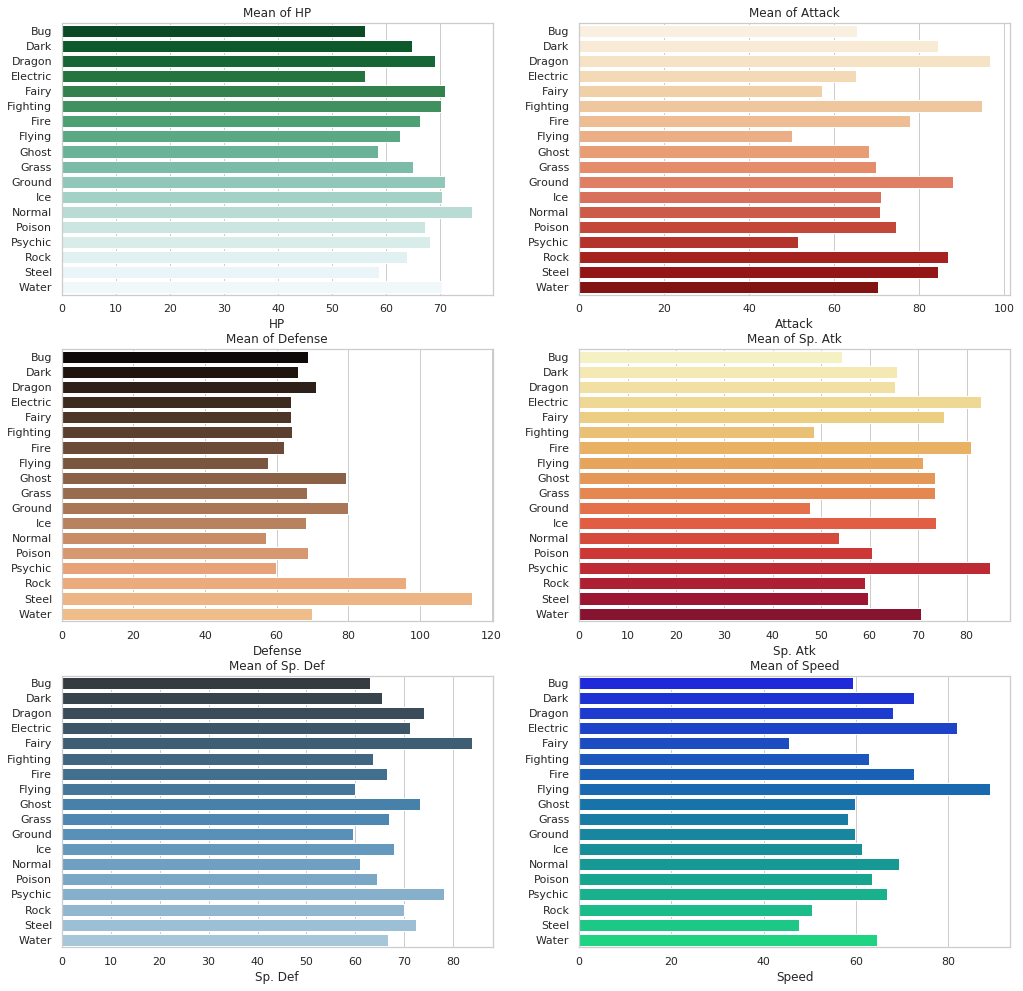

In [48]:
stats = stats_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']] #Get stats without 'Total' column
list_types = stats.index.unique().tolist()#Get types into a list
i= 1 #Set variable to distribute subplots
c=0 #set variable to distribute palettes
palette=['BuGn_r','OrRd','copper','YlOrRd','Blues_d','winter']
plt.figure(figsize=(17,17))


for stat in stats: #function to make a chart for each stat
    plt.subplot(3,2,i)
    i=i+1
    sns.barplot(x =stats[stat], y=list_types,palette = palette[c])
    c=c+1
    
    plt.title(str('Mean of ' + stat))

For this radar chart, I decided to compare dragon types to steel types because they are the top 2 strongest according to total stats and they both were very sought after types in the games (at least up to generation 3 to my knowledge). they are also commonly the elite four's hardest pokemon to defeat, so lets see how this goes!

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


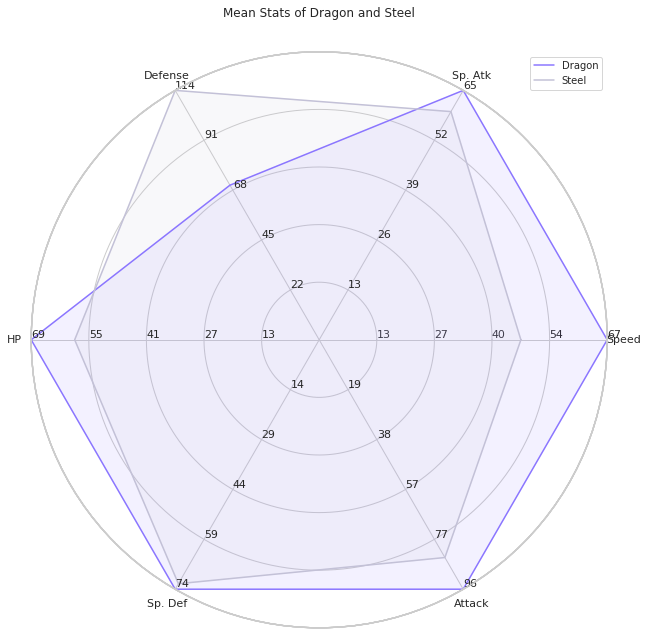

In [17]:
TYPE_LIST = ['Grass','Fire','Water','Bug','Normal','Poison',
            'Electric','Ground','Fairy','Fighting','Psychic',
            'Rock','Ghost','Ice','Dragon','Dark','Steel','Flying']

COLOR_LIST = ['#8ED752', '#F95643', '#53AFFE', '#C3D221', '#BBBDAF', '#AD5CA2', 
              '#F8E64E', '#F0CA42', '#F9AEFE', '#A35449', '#FB61B4', '#CDBD72', 
              '#7673DA', '#66EBFF', '#8B76FF', '#8E6856', '#C3C1D7', '#75A4F9']

# The colors are copied from this script: https://www.kaggle.com/ndrewgele/d/abcsds/pokemon/visualizing-pok-mon-stats-with-seaborn
# The colors look reasonable in this map: For example, Green for Grass, Red for Fire, Blue for Water...
COLOR_MAP = dict(zip(TYPE_LIST, COLOR_LIST))


# A radar chart example: http://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart
def _scale_data(data, ranges):
    (x1, x2), d = ranges[0], data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RaderChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = [""]+[str(int(x)) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
# select display colors according to Pokemon's Type 1
def select_color(types):
    colors = [None] * len(types)
    used_colors = set()
    for i, t in enumerate(types):
        curr = COLOR_MAP[t]
        if curr not in used_colors:
            colors[i] = curr
            used_colors.add(curr)
    unused_colors = set(COLOR_LIST) - used_colors
    for i, c in enumerate(colors):
        if not c:
            try:
                colors[i] = unused_colors.pop()
            except:
                raise Exception('Attempt to visualize too many pokemons. No more colors available.')
    return colors



df = stats
df = df.reset_index()
# In this order, 
# HP, Defense and Sp. Def will show on left; They represent defense abilities
# Speed, Attack and Sp. Atk will show on right; They represent attack abilities
# Attack and Defense, Sp. Atk and Sp. Def will show on opposite positions
use_attributes = ['Speed', 'Sp. Atk', 'Defense', 'HP', 'Sp. Def', 'Attack']
# choose the pokemons you like
use_pokemons = ['Steel','Dragon']

df_plot = df[df['Type 1'].map(lambda x:x in use_pokemons)==True] #df[df['Name']
use_pokemons = df_plot['Type 1'].values
datas = df_plot[use_attributes].values 
ranges = [[2**-20, df_plot[attr].max()] for attr in use_attributes]
colors = select_color(df_plot['Type 1']) # select colors based on pokemon Type 1 #'Type 1'

fig = plt.figure(figsize=(10, 10))
radar = RaderChart(fig, use_attributes, ranges)
for data, color, pokemon in zip(datas, colors, use_pokemons):
    radar.plot(data, color = color, label = pokemon)
    radar.fill(data, alpha = 0.1, color = color)
    radar.legend(loc = 1, fontsize = 'small')
plt.title('Mean Stats of '+(', '.join(use_pokemons[:-1])+' and '+use_pokemons[-1] if len(use_pokemons)>1 else use_pokemons[0]))
plt.show() 
      

<center><b>Conclusion</b></center>

Slaking has the highest total stats than any other non-legendary pokemon in the game and he is a normal type pokemon. Further, the results show that dragon overall has the highest total stats with Steel coming in a close second. Steel has quite the normal defense advantage, however dragon types outperform at everything else.